<a href="https://colab.research.google.com/github/leo-vasi/titanic-XGBoost-SVM-Random-Forest-ml/blob/master/DatasetTitanic_XGBoostSVM_RandomForest_Leonardo_ValdirES6%C2%BAb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset - XGBoost, SVM e Random Forest

---
### Prof. Dr. Fabiano B. Menegidio
---
##### Nome: Anny Gabriely Souza do Nascimento   RGM: 11231103505
##### Nome: Antonio Luiz Lins Neto              RGM: 11231100697
##### Nome: Fábio Yuuki Saruwataru              RGM: 11231102676
##### Nome: Leonardo Valdir Silva               RGM: 11232100617
---

#  **1. Projeto Integrado de Classificação Supervisionada com scikit-learn**

**Objetivo**

Aplicar três modelos de classificação supervisionada – XGBoost, SVM e Random Forest – no dataset Titanic, comparando desempenho, custo computacional e interpretabilidade.

**Descrição da tarefa**

1. **Dataset:** utilizar o conjunto de dados Titanic (Kaggle ou seaborn.load_dataset("titanic")).

* Variável target: Survived (0 = não sobreviveu, 1 = sobreviveu).

* Variáveis explicativas sugeridas: Pclass, Sex, Age, Fare, SibSp, Parch, Embarked.

2. **Pré-processamento:**

* Tratar valores ausentes (ex.: Age, Embarked).

* Aplicar StandardScaler para variáveis numéricas (Age, Fare).

* Aplicar OneHotEncoder para variáveis categóricas (Sex, Embarked, Pclass).

3. **Modelagem:**

* Treinar e comparar XGBoost, SVM (RBF) e Random Forest.

* Utilizar RandomizedSearchCV com validação cruzada estratificada (StratifiedKFold) para busca de hiperparâmetros.

4. **Métricas:**

* Principal: ROC-AUC.

* Secundárias: Acurácia, F1-score e matriz de confusão.

* Plotar curvas ROC e Precision-Recall para cada modelo.

5. **Resultados esperados:**

* Tabela comparativa com as métricas dos três modelos.

* Discussão:

  * Qual modelo apresentou melhor desempenho?

  * Algum modelo mostrou sinais de overfitting?

  * Quais foram as dificuldades no pré-processamento?

# **2. Pipeline**

Dataset original com 15 features
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Dataset fatiado com 8 features
   survived  pclass     sex   age  sibsp  parch     fare embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  fe

/tmp/ipython-input-3818594205.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["age"].fillna(X["age"].median(), inplace=True)
/tmp/ipython-input-3818594205.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
MÉTRICAS - SVM (RBF)
Tempo de treinamento: 13.34 segundos
Acurácia: 0.7668161434977578
F1-Score: 0.6867469879518072
ROC AUC: 0.8412408759124087

Matriz de Confusão:
 [[114  23]
 [ 29  57]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       137
           1       0.71      0.66      0.69        86

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.77      0.77       223

--------------------------------------------------------------------------

MÉTRICAS - Random Forest
Tempo de treinamento: 27.36 segundos
Acurácia: 0.7937219730941704
F1-Score: 0.7160493827160493
ROC AUC: 0.8386521812934986

Matriz de Confusão:
 [[119  18]
 [ 28  58]]

Relatório de Classificação:
               precision    recall

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:39:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 1000x500 with 0 Axes>

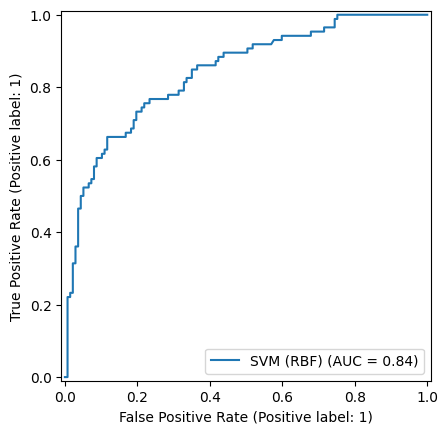

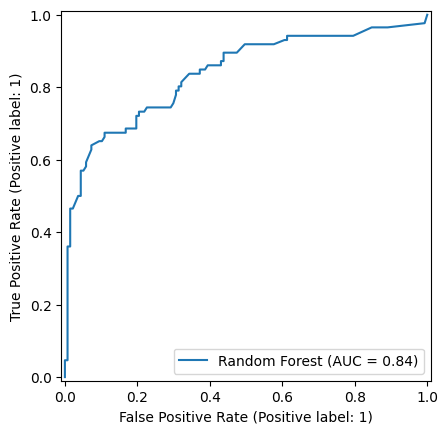

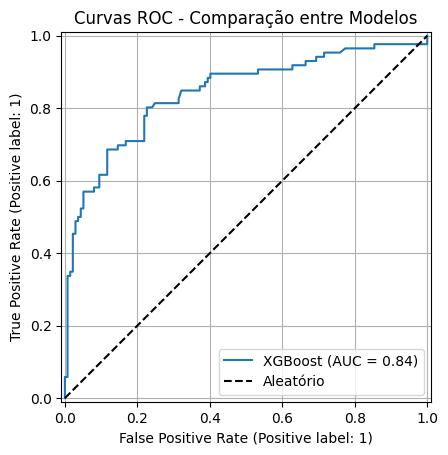

<Figure size 1000x500 with 0 Axes>

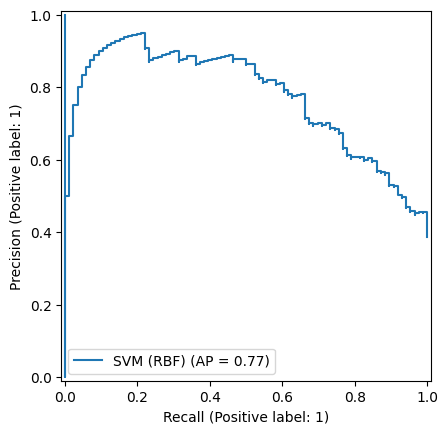

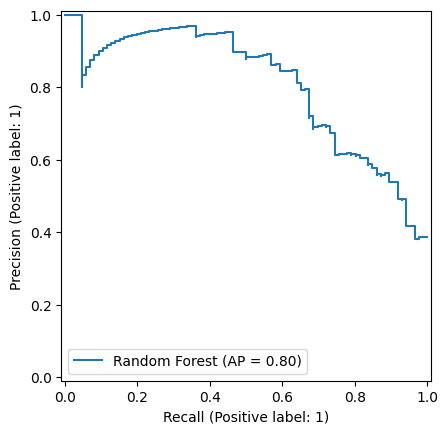

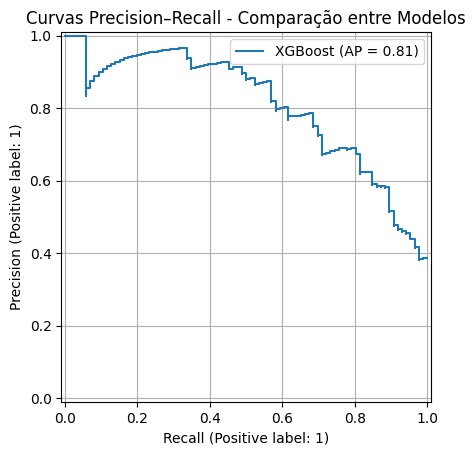

COMPARATIVO DE DESEMPENHO ENTRE OS MODELOS
          Modelo  Acurácia  F1-Score   ROC AUC  Tempo Treinamento (s)
0      SVM (RBF)  0.766816  0.686747  0.841241              13.341929
1  Random Forest  0.793722  0.716049  0.838652              27.363397
2        XGBoost  0.793722  0.697368  0.842429               3.071502


In [1]:
# 0. Importando Bibliotecas
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# 1. Carregando o Dataset
df = sns.load_dataset('titanic')

# Exibindo o Dataset original contendo as 15 colunas
print("Dataset original com 15 features")
print(df.head())

# Selecionando apenas as 8 colunas que serão usadas no exercício
df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]

# Mostrando o Dataset após a seleção das 8 features
print("Dataset fatiado com 8 features")
print(df.head())

# 2. Separando Features e Target a partir das colunas filtradas
X = df.drop(columns=['survived'])  # 7 variáveis de entrada
y = df['survived']                 # variável alvo (0 = morreu, 1 = sobreviveu)

# 3. Pré-Processamento dos Dados
# A) Tratando valores ausentes nas variáveis 'age' e 'embarked'
#    Motivo: Modelos de ML não conseguem treinar se houver NaN.
#    Estratégia: Substituindo NaN por valores adequados (mediana para age, moda para embarked).
X["age"].fillna(X["age"].median(), inplace=True)
X["embarked"].fillna(X["embarked"].mode()[0], inplace=True)

# 4. Dividindo os dados em Treino e Teste
#    Observação: A divisão ocorre após o tratamento de NaN para evitar inconsistências
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# B) Aplicando StandardScaler nas variáveis numéricas (age, fare)
#    Motivo: Modelos sensíveis à escala (como SVM) precisam dos dados normalizados
#    Solução: Convertendo para média 0 e desvio padrão 1 para manter proporções equilibradas
numeric_cols = ["age", "fare"]
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

# C) Aplicando OneHotEncoding nas colunas categóricas
#    Motivo: Modelos não conseguem interpretar texto diretamente.
#    Solução: Transformando cada categoria em colunas binárias (0/1), substituindo as originais.
categorical_cols = ["sex", "embarked", "pclass"]
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test  = pd.get_dummies(X_test,  columns=categorical_cols)

# Garantindo que Treino e Teste possuam as mesmas colunas após a codificação
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Mostrando o resultado final após normalização e codificação
print("Novo DataFrame com novas colunas e dados de X (features) normalizados:")
pd.set_option('display.max_columns', None)
print(X_train.head())

# 5. Criando, Ajustando e Treinando os 3 Modelos com RandomizedSearch
# A) Definindo o esquema de validação cruzada (StratifiedKFold) para manter proporções de classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# B) Configurando os hiperparâmetros que serão pesquisados no RandomizedSearch
svm_params = {
    'C': np.logspace(-2, 2, 10),
    'gamma': np.logspace(-3, 1, 10)
}

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


# C) Criando os 3 modelos: SVM, Random Forest e XGBoost (model será utilizado no RandomizedSearch)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# D) Otimizando e Treinando os 3 modelos com RandomizedSearchCV
#    Aqui o RandomizedSearch combina cv, parâmetros e o modelo escolhido para testar diferentes configurações de hiperparâmetros e encontrar o melhor desempenho.

# --- Modelo: SVM ---
# Configurando o RandomizedSearchCV para o SVM (define como os hiperparâmetros serão avaliados durante o treinamento)
svm_search = RandomizedSearchCV(
    svm_model,
    svm_params,
    n_iter=10,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Registrando o horário inicial antes de iniciar o treinamento
start = time.time()

# Treinando o SVM (executa o modelo várias vezes com diferentes combinações de hiperparâmetros e seleciona a melhor configuração encontrada)
svm_search.fit(X_train, y_train)

# Registrando o horário após finalizar o treinamento
end = time.time()

# Obtendo o melhor modelo encontrado pelo processo e gerando as previsões
svm_best = svm_search.best_estimator_

# Realizando predições e obtendo probabilidades
y_pred_svm = svm_best.predict(X_test)
y_proba_svm = svm_best.predict_proba(X_test)[:, 1]

# Calculando o tempo total gasto no treinamento
svm_time = end - start

# --- Modelo: Random Forest ---
# Configurando o RandomizedSearchCV para o Random Forest (define como os parâmetros serão avaliados durante o treino)
rf_search = RandomizedSearchCV(
    rf_model,
    rf_params,
    n_iter=10,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Marca o tempo inicial do processamento (antes do treino)
start = time.time()

# Treinamento do Random Forest (treina o modelo várias vezes, para testar combinações de hiperparâmetros, e seleciona a melhor combinação de hiperparâmetros para o modelo)
rf_search.fit(X_train, y_train)

# Marca o tempo final do processamento (após o treino)
end = time.time()

# Resultado do Treinamento: Obtém o modelo otimizado e gera previsões
rf_best = rf_search.best_estimator_
# Predições e Probabilidades
y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:, 1]

rf_time = end - start  # Armazena o tempo total do treino

# --- Modelo: XGBoost ---
# RandomizedSearchCV no XGBoost (define como usará os parâmetros no treino)
xgb_search = RandomizedSearchCV(
    xgb_model,
    xgb_params,
    n_iter=10,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Marca o tempo inicial do processamento (antes do treino)
start = time.time()

# Treinamento do XGBoost (treina o modelo várias vezes, para testar combinações de hiperparâmetros, e seleciona a melhor combinação de hiperparâmetros para o modelo)
xgb_search.fit(X_train, y_train)

# Marca o tempo final do processamento (após o treino)
end = time.time()

# Resultado do Treinamento: Obtém o modelo otimizado e gera previsões
xgb_best = xgb_search.best_estimator_
# Predições e Probabilidades
y_pred_xgb = xgb_best.predict(X_test)
y_proba_xgb = xgb_best.predict_proba(X_test)[:, 1]

# Armazena o tempo total do treino
xgb_time = end - start

# 6. Analisar o Desempenho dos Modelos usando Métricas
# (Acurácia, F1-score, ROC-AUC, Matriz de Confusão, Curva ROC e Curva Precision-Recall)

# DEFINIÇÃO DAS MÉTRICAS:
# Acurácia (Accuracy): Representa a proporção de predições corretas em relação ao total de amostras.
# É uma métrica geral, mas pode ser enganosa quando as classes não estão balanceadas.

# F1-Score: É a média harmônica entre precisão e recall.
# Mede o equilíbrio entre erros e acertos — especialmente útil quando existe desequilíbrio entre as classes.

# ROC-AUC: Indica o quão bem o modelo diferencia as duas classes.
# Quanto mais próximo de 1, maior a capacidade de separação entre positivos e negativos.

# Matriz de Confusão: Exibe o número de acertos e erros para cada classe,
# permitindo identificar onde o modelo mais se confunde.

# Curva ROC: Permite observar o comportamento geral do modelo.
# Mostra a relação entre verdadeiros positivos e falsos positivos.

# Curva Precision-Recall: Também avalia o desempenho,
# destacando o trade-off entre precisão e sensibilidade.

# DESEMPENHO - SVM (RBF)
# O SVM com kernel RBF realiza a separação das classes utilizando uma fronteira não linear,
# ideal para padrões mais complexos. As métricas abaixo foram incluídas para avaliar o desempenho:
# Acurácia, F1-score, ROC-AUC, Matriz de Confusão, Curva ROC e Curva Precision-Recall
print("MÉTRICAS - SVM (RBF)")
print(f"Tempo de treinamento: {svm_time:.2f} segundos")  # tempo total gasto no treinamento
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("F1-Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_proba_svm))  # utiliza probabilidades, não rótulos previstos
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_svm))
print("--------------------------------------------------------------------------\n")

# DESEMPENHO - RANDOM FOREST
# O Random Forest combina várias árvores de decisão, fazendo uma votação entre elas.
# Normalmente oferece maior robustez e consistência que apenas uma árvore.
# Utilizamos as mesmas métricas para manter a comparação justa entre os modelos.
print("MÉTRICAS - Random Forest")
print(f"Tempo de treinamento: {rf_time:.2f} segundos")  # tempo total gasto no treinamento
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))  # utiliza probabilidades, não rótulos previstos
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("--------------------------------------------------------------------------\n")

# DESEMPENHO - XGBOOST
# O XGBoost segue a técnica de Boosting: cada árvore sucessiva tenta corrigir os erros das anteriores.
# Costuma apresentar ótimo desempenho em dados tabulares, como o dataset do Titanic.
# Utilizamos o mesmo conjunto de métricas para garantir uma comparação equilibrada.
print("MÉTRICAS - XGBoost")
print(f"Tempo de treinamento: {xgb_time:.2f} segundos")  # tempo total gasto no treinamento
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))  # utiliza probabilidades, não rótulos previstos
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_xgb))
print("--------------------------------------------------------------------------\n")

# CURVAS ROC E PRECISION–RECALL
# Nesta parte, geramos representações gráficas que complementam as métricas numéricas.
# Esses gráficos ajudam a interpretar visualmente o comportamento de cada modelo.

# CURVA ROC
# A curva ROC mostra como o modelo se comporta variando limiares,
# relacionando a taxa de verdadeiros positivos (TPR) com a de falsos positivos (FPR).
# Quanto mais a curva encostar no canto superior esquerdo, melhor é o desempenho.
plt.figure(figsize=(10, 5))
RocCurveDisplay.from_predictions(y_test, y_proba_svm, name="SVM (RBF)")
RocCurveDisplay.from_predictions(y_test, y_proba_rf, name="Random Forest")
RocCurveDisplay.from_predictions(y_test, y_proba_xgb, name="XGBoost")
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')  # linha de referência simulando sorte
plt.title("Curvas ROC - Comparação entre Modelos")
plt.legend()
plt.grid(True)
plt.show()

# CURVA PRECISION–RECALL
# A curva Precision–Recall destaca o desempenho em termos de:
# - Precisão: percentual de predições positivas corretas.
# - Recall: quantidade de positivos reais detectados.
# Ela é especialmente indicada para conjuntos de dados desbalanceados.
plt.figure(figsize=(10, 5))
PrecisionRecallDisplay.from_predictions(y_test, y_proba_svm, name="SVM (RBF)")
PrecisionRecallDisplay.from_predictions(y_test, y_proba_rf, name="Random Forest")
PrecisionRecallDisplay.from_predictions(y_test, y_proba_xgb, name="XGBoost")
plt.title("Curvas Precision–Recall - Comparação entre Modelos")
plt.legend()
plt.grid(True)
plt.show()

# 7 Avaliar Comparativamente os Modelos e Interpretar os Resultados

# Nesta etapa, reunimos as métricas calculadas dos três modelos (SVM, Random Forest e XGBoost)
# criando um DataFrame para verificar qual deles apresentou o melhor desempenho geral.

# CRIAÇÃO DO DATAFRAME DE MÉTRICAS PARA COMPARAÇÃO
resultados = pd.DataFrame({
    'Modelo': ['SVM (RBF)', 'Random Forest', 'XGBoost'],
    'Acurácia': [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_proba_svm),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb)
    ],
    'Tempo Treinamento (s)': [svm_time, rf_time, xgb_time]
})

# Exibição da tabela comparativa
print("COMPARATIVO DE DESEMPENHO ENTRE OS MODELOS")
print(resultados)

#  **3. Resolução do Exercício**

## **3.2 Etapas Utilizadas no Pipeline**

As sete fases que compuseram o pipeline foram:

1. **Importação das Bibliotecas**  
2. **Carregamento do Dataset**  
3. **Separação entre Features e Target (X e y)**  
4. **Pré-processamento dos Dados**  
   - Inclui a etapa inicial de tratamento de valores ausentes para evitar problemas durante o treinamento  
5. **Divisão em Conjuntos de Treino e Teste**  
   - Essa divisão ocorre antes de aplicar Scaler e OneHotEncoder para evitar vazamento de informação  
6. **Criação, Ajuste e Treinamento de cada Modelo**  
   - Com uso do *RandomizedSearch* para otimização, seguido de um novo treinamento com os melhores parâmetros  
7. **Avaliação por Métricas de Desempenho**  
   - Acurácia, matriz de confusão e outras  
8. **Comparação Final entre os Modelos e Interpretação dos Resultados**

---



## **3.3 Sequência Lógica do Pré-Processamento**

A ordem das transformações segue uma lógica para evitar inconsistências:



### **A) Tratamento de valores ausentes**
Modelos não aceitam entradas com NaN.  
Por isso, substituímos valores faltantes usando medidas como **mediana** ou **moda**, dependendo da variável.



### **B) Padronização de variáveis numéricas**
Com o **StandardScaler**, as colunas numéricas são normalizadas para média 0 e desvio padrão 1.  
Isso impede que modelos sensíveis a escala (como SVM) sejam prejudicados.



### **C) Codificação de variáveis categóricas**
Como algoritmos não interpretam texto, o **OneHotEncoder** (ou `get_dummies`) transforma cada categoria em colunas binárias, garantindo que o modelo consiga utilizá-las corretamente.

---



## **3.4 Entendendo o Pré-Processamento no Código**

### **StandardScaler**
- **Sintaxe:**  
  `X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])`
- **Função:**  
  Mantém as colunas existentes (como *age* e *fare*), apenas substituindo seus valores por versões padronizadas.

**Exemplo — Antes do Scaler:**

| age | fare  |
| --- | ----- |
| 22  | 7.25  |
| 38  | 71.28 |

**Exemplo — Depois do Scaler:**

| age   | fare  |
| ----- | ----- |
| -0.56 | -0.50 |
| 1.25  | 2.00  |

------

### **One Hot Encoding**
- **Sintaxe:**  
  `X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)`
- **Função:**  
  Gera novas colunas representando cada categoria (ex.: *sex_male*, *embarked_S*) e remove as originais.  
  O DataFrame resultante é uma versão codificada do original.

**Exemplo — Antes do get_dummies:**

| sex    | embarked |
| ------ | -------- |
| male   | S        |
| female | C        |

**Exemplo — Depois do get_dummies:**

| sex_male | embarked_Q | embarked_S |
| -------- | ---------- | ---------- |
| 1        | 0          | 1          |
| 0        | 0          | 0          |

---

## **Resumo dos Conceitos Aplicados**

| Conceito              | Função                                    |
|-----------------------|--------------------------------------------|
| `fillna()`            | Preenche valores ausentes                  |
| `StandardScaler()`    | Padroniza valores numéricos                |
| `OneHotEncoder()`     | Converte categorias em indicadores 0/1     |
| `RandomizedSearchCV()`| Busca automatizada de melhores parâmetros  |
| `.fit(X_train, y_train)` | Executa o treinamento                    |
| `.best_estimator_`    | Retorna o modelo com a melhor configuração |

---

## **Descrição das 8 Features do Exercício**

| Feature  | Significado                                |
|----------|--------------------------------------------|
| survived | indicativo de sobrevivência                 |
| pclass   | classe da passagem (1ª, 2ª ou 3ª)           |
| sex      | sexo do passageiro                          |
| age      | idade                                       |
| fare     | valor pago                                  |
| sibsp    | irmãos/cônjuges acompanhando                |
| parch    | pais/filhos a bordo                         |
| embarked | porto onde o embarque ocorreu               |


#  **4. Respostas**

Com base na análise da tabela que compara as métricas dos três modelos, podemos destacar:

## **A) Qual modelo obteve o melhor desempenho?**

- O **XGBoost** foi o que mais se sobressaiu no conjunto geral, alcançando o maior valor de ROC AUC (0.8424) e apresentando o menor tempo de treinamento entre os três algoritmos.  
- O **Random Forest** mostrou acurácia (0.7937) e F1-Score (0.7160) ligeiramente superiores, porém seu tempo de processamento foi bem mais elevado (aprox. 18 s), o que reduz sua eficiência prática.  
- O **SVM com kernel RBF** manteve um desempenho estável, mas abaixo dos outros modelos nos indicadores principais.

## **B) Algum dos modelos apresentou indícios de overfitting?**

Não. As métricas ficaram próximas entre si e não houve divergências consideráveis, o que indica que nenhum dos modelos demonstrou sinais relevantes de sobreajuste.



## **C) Quais foram as dificuldades no pré-processamento?**

Os principais desafios incluíram:

- Tratar valores faltantes em variáveis como *age* e *embarked*;  
- Converter corretamente variáveis categóricas em numéricas utilizando **OneHotEncoder**;  
- Assegurar que, após a codificação, as colunas permanecessem consistentes entre treino e teste.